In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
flight = pd.read_excel('C:\\xampp\\htdocs\\Project\\Training_model\\FlightData.xlsx')
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [67]:
pd.set_option('future.no_silent_downcasting', True)
flight.shape

(10683, 11)

In [68]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [69]:
flight['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
1h 25m     135
2h 15m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h 50m      64
9h          64
5h          63
5h 15m      62
11h 45m     62
11h         62
14h 25m     61
1h 20m      61
6h 35m      60
12h 10m     57
22h 55m     57
10h 30m     57
12h 45m     56
5h 45m      54
16h 5m      53
12h 30m     52
7h 20m      52
11h 30m     52
4h 55m      51
15h 10m     51
8h 25m      50
10h 15m     50
12h         49
10h 25m     49
10h         49
12h 15m     48
6h 15m      47
11h 5m      45
5h 20m      45
26h 55m     44
8h 55m      42
9h 15m      42
14h 5m      42
13h         42
9h 20m      41
20h 10m     41
9h 35m      41
3h 10m      40
17h 5m      40
23h 40m     40
21h 15m     39
26h 35m     39
1

In [70]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [71]:
flight.dropna(inplace=True)
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [72]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [73]:
flight['Journey_Day'] = pd.to_datetime(flight.Date_of_Journey, format = '%d/%m/%Y').dt.day
flight['Journey_Month'] = pd.to_datetime(flight.Date_of_Journey, format = '%d/%m/%Y').dt.month
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [74]:
flight['Dep_hour'] = pd.to_datetime(flight['Dep_Time'], format='%H:%M').dt.hour
flight['Dep_Minute'] = pd.to_datetime(flight['Dep_Time'], format='%H:%M').dt.minute
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [75]:
# Handle arrival time with or without dates
def parse_arrival_time(arrival):
    try:
        # If the value includes a date (e.g., '01:10 22 Mar'), parse it accordingly
        return pd.to_datetime(arrival, format='%H:%M %d %b')
    except ValueError:
        # If only time is present (e.g., '13:15'), parse it accordingly
        return pd.to_datetime(arrival, format='%H:%M')

# Apply the function to parse times correctly
flight['Parsed_Arrival_Time'] = flight['Arrival_Time'].apply(parse_arrival_time)

# Extract hours and minutes
flight['Arrival_hour'] = flight['Parsed_Arrival_Time'].dt.hour
flight['Arrival_Minute'] = flight['Parsed_Arrival_Time'].dt.minute

# Drop the temporary parsed column
flight.drop(columns=['Parsed_Arrival_Time'], inplace=True)


In [76]:
flight.drop(columns = ['Dep_Time', 'Date_of_Journey'],inplace=True)
flight.drop(columns = 'Arrival_Time',inplace = True)
flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [77]:
duration = list(flight.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + '0m'
        else:
            duration[i] = '0h' + duration[i]

duration
duration_hour = []
duration_minute = []

for dur in duration:
    hours = int(dur.split('h')[0])  # Extract hours
    minutes = int(dur.split('h')[1].split('m')[0].strip())  # Extract minutes
    duration_hour.append(hours)
    duration_minute.append(minutes)


In [78]:
flight['Duration_Hour'] = duration_hour
flight['Duration_Minute'] = duration_minute

In [79]:
flight.drop(columns = 'Duration',inplace=True)

In [80]:
flight.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [81]:
flight['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [82]:
print(flight['Airline'].unique())
print(flight['Airline'].dtype)

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
object


In [83]:
Airline = flight['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [84]:
flight['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

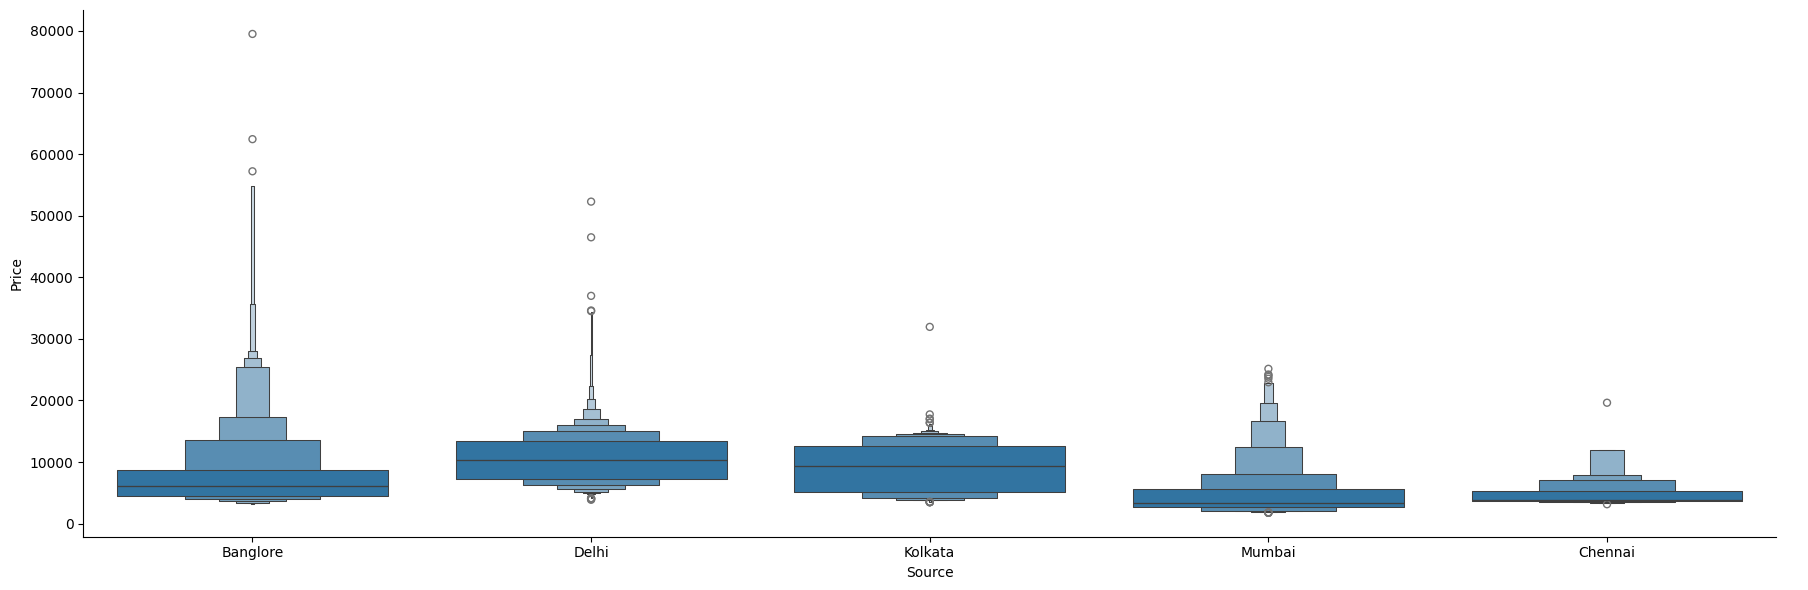

In [85]:
sns.catplot(y='Price', x='Source', data = flight.sort_values('Price',ascending=False), kind='boxen', height=6, aspect=3)

In [86]:
flight['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [87]:
Source = flight['Source']

Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [88]:
flight['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [89]:
Destination = flight['Destination']

Destination = pd.get_dummies(Destination, drop_first=True)
flight.replace({'Destination': {False: 0, True: 1}}, inplace=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [90]:
flight['Route']

0                                BLR → DEL
1                    CCU → IXR → BBI → BLR
2                    DEL → LKO → BOM → COK
3                          CCU → NAG → BLR
4                          BLR → NAG → DEL
5                                CCU → BLR
6                          BLR → BOM → DEL
7                          BLR → BOM → DEL
8                          BLR → BOM → DEL
9                          DEL → BOM → COK
10                         DEL → BLR → COK
11                               CCU → BLR
12                               MAA → CCU
13                         CCU → BOM → BLR
14                               CCU → BLR
15                   DEL → AMD → BOM → COK
16                         DEL → PNQ → COK
17                         DEL → BOM → COK
18                   DEL → CCU → BOM → COK
19                         DEL → BOM → COK
20                         DEL → BOM → COK
21                         BLR → COK → DEL
22                               BLR → DEL
23         

In [91]:
flight.drop(columns=['Route','Additional_Info'],axis=1, inplace=True)

In [92]:
flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [93]:
flight['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [94]:
flight.replace({'non-stop':0,'1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace = True)

In [95]:
flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [96]:
flight = pd.concat( [flight, Airline, Source, Destination], axis = 1)
flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [97]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [98]:
flight.drop(columns=['Airline', 'Source', 'Destination'], inplace=True, errors='ignore')
flight.replace({False: 0, True: 1}, inplace=True)
flight.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [99]:
flight.shape

(10682, 30)

Test Data

In [100]:
flight_test = pd.read_excel('C:\\xampp\\htdocs\\Project\\Training_model\\FlightData.xlsx')
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [101]:
duration = flight_test['Duration'].astype(str).str.lower().str.replace(' ', '')

# Ensure all durations have both 'h' and 'm'
duration = duration.apply(lambda x: x + '0m' if 'h' in x and 'm' not in x else x)
duration = duration.apply(lambda x: '0h' + x if 'h' not in x and 'm' in x else x)

# Extract hours and minutes safely
duration_hour = duration.str.extract(r'(\d+)h')[0].fillna(0).astype(int)
duration_minute = duration.str.extract(r'(\d+)m')[0].fillna(0).astype(int)

# Assign new columns
flight_test['Duration_Hour'] = duration_hour
flight_test['Duration_Minute'] = duration_minute

# Drop the original Duration column
flight_test.drop(columns=['Duration'], inplace=True)

print(flight_test[['Duration_Hour', 'Duration_Minute']].head())


   Duration_Hour  Duration_Minute
0              2               50
1              7               25
2             19                0
3              5               25
4              4               45


In [102]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_Hour,Duration_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,4,45


In [103]:
# Handle arrival time with or without dates
def parse_arrival_time(arrival):
    try:
        # If the value includes a date (e.g., '01:10 22 Mar'), parse it accordingly
        return pd.to_datetime(arrival, format='%H:%M %d %b')
    except ValueError:
        # If only time is present (e.g., '13:15'), parse it accordingly
        return pd.to_datetime(arrival, format='%H:%M')

# Apply the function to parse times correctly
flight_test['Parsed_Arrival_Time'] = flight_test['Arrival_Time'].apply(parse_arrival_time)

# Extract hours and minutes
flight_test['Arrival_hour'] = flight_test['Parsed_Arrival_Time'].dt.hour
flight_test['Arrival_Minute'] = flight_test['Parsed_Arrival_Time'].dt.minute

# Drop the temporary parsed column
flight_test.drop(columns=['Parsed_Arrival_Time'], inplace=True)

In [104]:
print("_"*50)
print("Shape")
print(flight_test.shape)

print("_"*50)
print("Info")
print(flight_test.info())

print("_"*50)
print("Check null value")
print(flight_test.isnull().sum())

print("_"*50)
print("Drop null values rows")
flight_test.dropna(inplace=True)

print("_"*50)
print("Check null values")
print(flight_test.isnull().sum())

print("_"*50)
print("Fetch journey day and month from Date_of_Journey")
flight_test['Journey_Day'] = pd.to_datetime(flight_test['Date_of_Journey'], format='%d/%m/%Y').dt.day
flight_test['Journey_Month'] = pd.to_datetime(flight_test['Date_of_Journey'], format='%d/%m/%Y').dt.month
flight_test.drop(columns=['Date_of_Journey'], inplace=True)
print(flight_test.head())

print("_"*50)
print("Convert Departure time")
flight_test['Dep_hour'] = pd.to_datetime(flight_test['Dep_Time'], format='%H:%M').dt.hour
flight_test['Dep_minute'] = pd.to_datetime(flight_test['Dep_Time'], format='%H:%M').dt.minute
flight_test.drop(columns=['Dep_Time'], inplace=True)
print(flight_test.head())

print("_"*50)
print("Normalize total stops")
pd.set_option('future.no_silent_downcasting', True)
flight_test.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)

print("_"*50)
print("OneHotEncoder on Airline column")
Airline = pd.get_dummies(flight_test['Airline'], drop_first=True)
print(Airline.head())

print("_"*50)
print("OneHotEncoder on Source column")
Source = pd.get_dummies(flight_test['Source'], drop_first=True)
print(Source.head())

print("_"*50)
print("OneHotEncoder on Destination column")
Destination = pd.get_dummies(flight_test['Destination'], drop_first=True)
print(Destination.head())

print("_"*50)
print("Drop Route and Additional_Info")
flight_test.drop(columns=['Route', 'Additional_Info'], axis=1, inplace=True)

print("_"*50)
print("Concatenate Airline, Source, Destination")
flight_test = pd.concat([flight_test, Airline, Source, Destination], axis=1)
flight_test.drop(columns=['Airline', 'Source', 'Destination'], inplace=True)

print("_"*50)
print("Show head")
flight.replace({False: 0, True: 1}, inplace=True)
print(flight_test.head())

print("_"*50)
print("Shape")
print(flight_test.shape)

__________________________________________________
Shape
(10683, 14)
__________________________________________________
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Duration_Hour    10683 non-null  int64 
 11  Duration_Minute  10683 non-null  int64 
 12  Arrival_hour     10683 non-null  int32 
 13  Arrival_Minute   10683 non-null  int32 
dtypes: int32(2), int64(3), object(9)
memory u

In [105]:
flight_test.replace({False: 0, True: 1}, inplace=True)
flight_test.drop(columns=['Price'], inplace=True)
flight_test.drop(columns=['Arrival_Time'], inplace=True)
flight_test.head()

,Total_Stops,Duration_Hour,Duration_Minute,Arrival_hour,Arrival_Minute,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,2,50,1,10,24,3,22,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7,25,13,15,1,5,5,50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,19,0,4,25,9,6,9,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,5,25,23,30,12,5,18,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,4,45,21,35,1,3,16,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Feature Selection

In [106]:
flight.shape , flight_test.shape

((10682, 30), (10682, 29))

In [107]:
x = flight.drop(columns= 'Price', axis=1)
y = flight['Price']
x.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [108]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

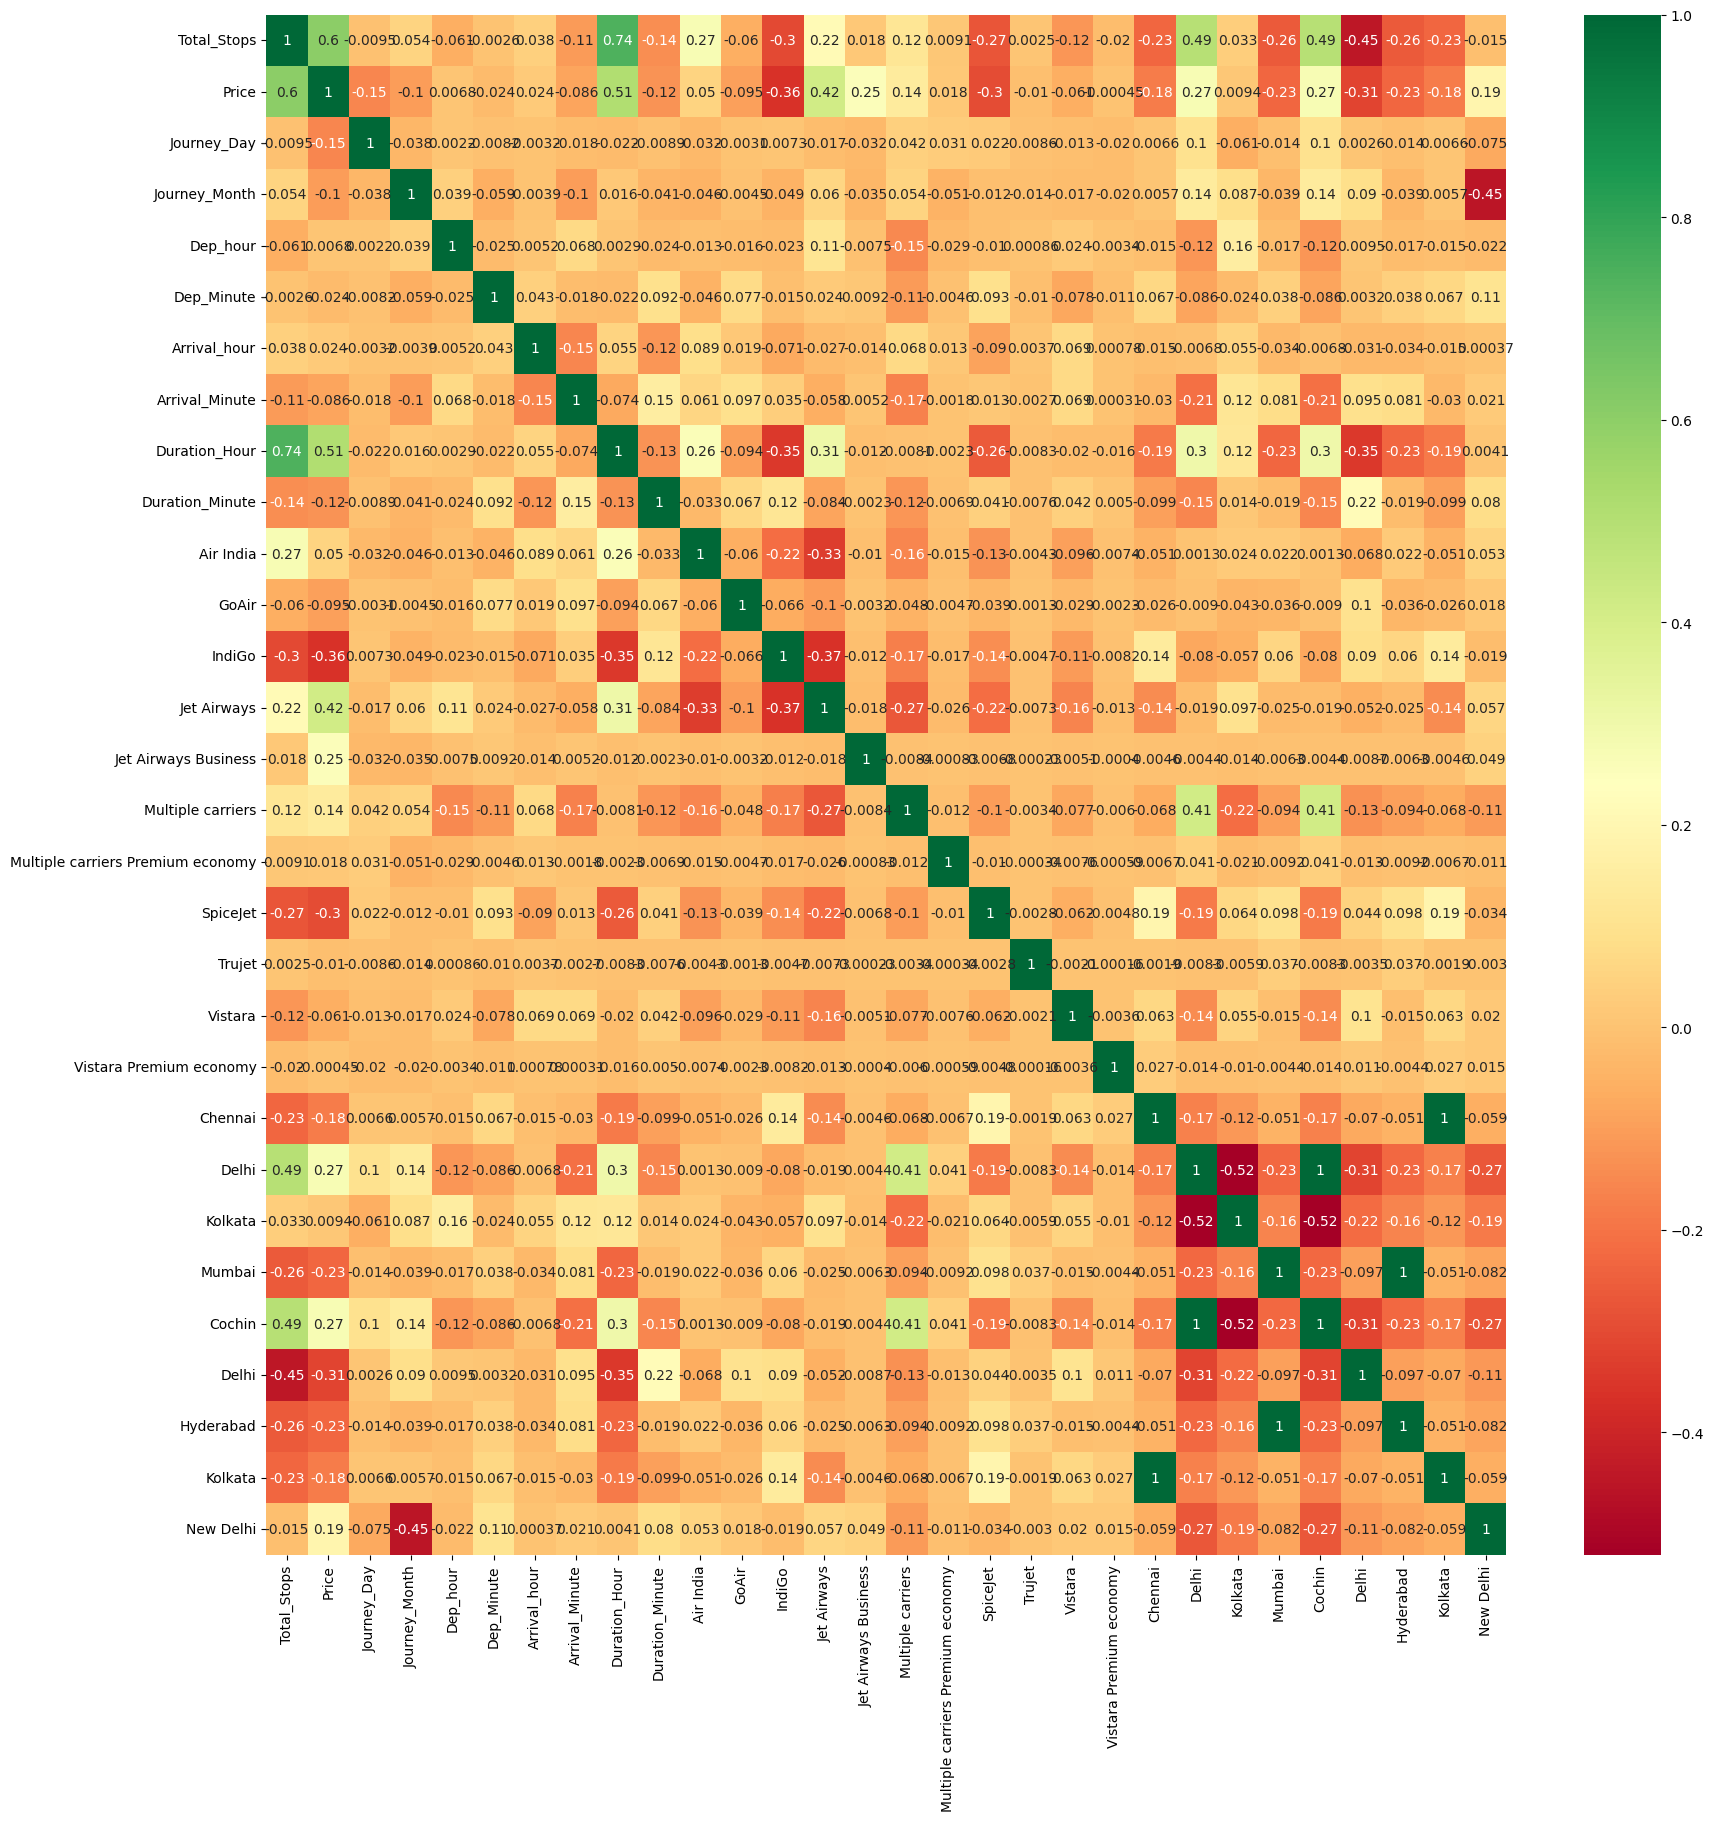

In [109]:
plt.figure(figsize=(20,20))
sns.heatmap(flight.corr(), annot= True, cmap = 'RdYlGn')
plt.show()

Fit model using Random Forest

In [110]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=51)

In [111]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train , y_train)

RandomForestRegressor()

In [112]:
pred = rfr.predict(x_test)

In [113]:
rfr.score(x_train , y_train)

0.9545272956428912

In [114]:
rfr.score(x_test,y_test)

0.8256130915478732

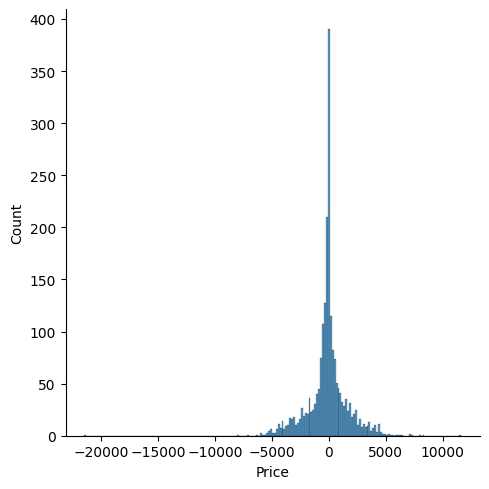

In [115]:
sns.displot(y_test - pred)

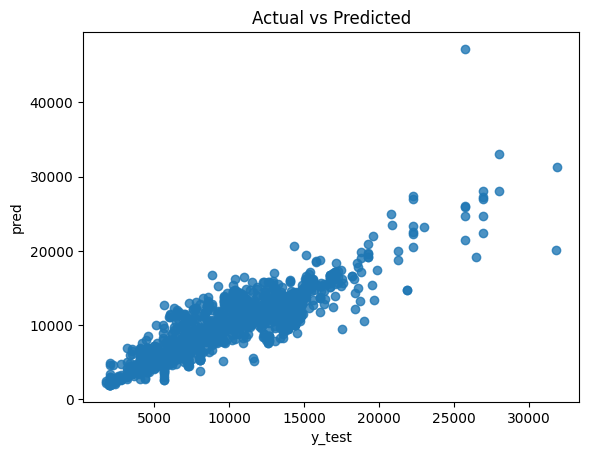

In [116]:
plt.scatter(y_test, pred, alpha=0.8)
plt.xlabel('y_test')  
plt.ylabel('pred')    
plt.title('Actual vs Predicted')
plt.show()

In [117]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test , pred)))

MAE: 1127.7007950132588
MSE: 3269108.5329653523
RMSE: 1808.0676240023083


In [118]:
metrics.r2_score(y_test,pred)

0.8256130915478732

Hyperprameter Tuning

In [119]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(100,2000,10)]
max_depth = [int(x) for x in np.linspace(100,2000,10)]
min_samples_split = [2,4,6,8,10,12,14]
min_samples_leaf = [1,3,5,7,8,10]
max_features = ['sqrt','log2','auto', None]

random_search = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'max_features' : max_features
}

random_search

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'max_depth': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
 'min_samples_leaf': [1, 3, 5, 7, 8, 10],
 'max_features': ['sqrt', 'log2', 'auto', None]}

In [120]:
rfr_random = RandomizedSearchCV(estimator=rfr , param_distributions=random_search , n_iter=2 , cv = 5 , verbose=2, random_state=51, n_jobs=-1)

In [121]:
rf = RandomForestRegressor(max_features=[5,10,15,20])
rfr_random.fit(x_train , y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=2, n_jobs=-1,
                   param_distributions={'max_depth': [100, 311, 522, 733, 944,
                                                      1155, 1366, 1577, 1788,
                                                      2000],
                                        'max_features': ['sqrt', 'log2', 'auto',
                                                         None],
                                        'min_samples_leaf': [1, 3, 5, 7, 8, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=51, verbose=2)

In [122]:
rfr_random.best_params_


{'n_estimators': 1155,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 311}

In [123]:
rf_final=RandomForestRegressor(n_estimators= 1155,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'log2',
 max_depth= 311)
rf_final.fit(x_train,y_train)

RandomForestRegressor(max_depth=311, max_features='log2', n_estimators=1155)

In [124]:
prediction = rf_final.predict(x_test)

In [125]:
from sklearn.metrics import mean_absolute_error,r2_score

In [126]:
print("MAE",mean_absolute_error(prediction,y_test))
print("R2",r2_score(prediction,y_test))

MAE 1232.8479672392455
R2 0.7884157900149394


In [127]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(rf_final, f)

In [128]:
print(rf_final.feature_importances_,"\n\n")
print(rf_final.feature_names_in_)

[1.39511525e-01 1.32202111e-01 5.50482730e-02 3.93025230e-02
 3.15965197e-02 4.00712250e-02 3.00200500e-02 1.84461550e-01
 3.29059648e-02 1.17675091e-02 4.06923073e-03 4.78712799e-02
 7.02178301e-02 4.99315319e-02 9.23050578e-03 2.18133410e-04
 2.02294880e-02 7.91304353e-05 3.95073996e-03 7.66295603e-05
 1.95919375e-03 1.40327813e-02 9.57658206e-03 9.34692136e-03
 1.27151660e-02 2.01982492e-02 8.23482533e-03 2.32504935e-03
 1.88494809e-02] 


['Total_Stops' 'Journey_Day' 'Journey_Month' 'Dep_hour' 'Dep_Minute'
 'Arrival_hour' 'Arrival_Minute' 'Duration_Hour' 'Duration_Minute'
 'Air India' 'GoAir' 'IndiGo' 'Jet Airways' 'Jet Airways Business'
 'Multiple carriers' 'Multiple carriers Premium economy' 'SpiceJet'
 'Trujet' 'Vistara' 'Vistara Premium economy' 'Chennai' 'Delhi' 'Kolkata'
 'Mumbai' 'Cochin' 'Delhi' 'Hyderabad' 'Kolkata' 'New Delhi']
